# Data Cleaning

In [91]:
# Import Library & Load Data
import pandas as pd
import numpy as np

# Load CSV misalnya
df = pd.read_csv("Fashion_Retail_Sales.csv")

In [92]:
# Cek Informasi Awal Dataset
print(df.info())
print(df.isna().mean() * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
 6   Unnamed: 6             0 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 186.1+ KB
None
Customer Reference ID      0.000000
Item Purchased             0.000000
Purchase Amount (USD)     19.117647
Date Purchase              0.000000
Review Rating              9.529412
Payment Method             0.000000
Unnamed: 6               100.000000
dtype: float64


In [93]:
# Drop Kolom yang Tidak Dibutuhkan
df.drop(columns=['Unnamed: 6'], inplace=True)

In [94]:
# Tangani Format Tanggal
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format='mixed', dayfirst=True, errors='coerce')

In [96]:
# Tangani Missing Values
df = df.dropna(subset=['Purchase Amount (USD)'])
df = df.dropna(subset=['Review Rating'])

In [97]:
# Hilangkan Duplikat
df.drop_duplicates(inplace=True)

In [99]:
# Buat Kolom Waktu Tambahan
df['Year'] = df['Date Purchase'].dt.year
df['Month'] = df['Date Purchase'].dt.month
df['Month_Name'] = df['Date Purchase'].dt.strftime('%b')  # Jan, Feb, dst
df['Day'] = df['Date Purchase'].dt.day
df['Weekday'] = df['Date Purchase'].dt.day_name()  # Monday, Tuesday, dst

In [100]:
# Final Cek Dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2487 entries, 1 to 3399
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Reference ID  2487 non-null   int64         
 1   Item Purchased         2487 non-null   object        
 2   Purchase Amount (USD)  2487 non-null   float64       
 3   Date Purchase          2487 non-null   datetime64[ns]
 4   Review Rating          2487 non-null   float64       
 5   Payment Method         2487 non-null   object        
 6   Year                   2487 non-null   int32         
 7   Month                  2487 non-null   int32         
 8   Month_Name             2487 non-null   object        
 9   Day                    2487 non-null   int32         
 10  Weekday                2487 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 204.0+ KB
None
   Customer Reference ID Item Pur

In [101]:
# Simpan dataset yang sudah bersih ke file CSV baru
df.to_csv("cleaned_retail_sales_data.csv", index=False)
print("Dataset telah disimpan sebagai 'cleaned_retail_sales_data.csv'.")

Dataset telah disimpan sebagai 'cleaned_retail_sales_data.csv'.


# A. Analisis Penjualan

### 1. Total Revenue Keseluruhan

In [102]:
total_revenue = df['Purchase Amount (USD)'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $372,080.00


### 2. Rata-rata Pembelian per Transaksi

In [103]:
average_purchase_per_transaction = df['Purchase Amount (USD)'].mean()
print(f"Average Purchase per Transaction: ${average_purchase_per_transaction:,.2f}")

Average Purchase per Transaction: $149.61


### 3. Item Paling Laris Berdasarkan Jumlah Pembelian

In [104]:
top_items = df['Item Purchased'].value_counts().head(1)  # Menampilkan item terlaris
print(f"Top Item Purchased: \n{top_items}")

Top Item Purchased: 
Item Purchased
Shorts    69
Name: count, dtype: int64


### 4. Rata-rata Nilai Pembelian per Item

In [105]:
average_purchase_per_item = df.groupby('Item Purchased')['Purchase Amount (USD)'].mean()
print(f"Average Purchase per Item: \n{average_purchase_per_item.head(10)}")

Average Purchase per Item: 
Item Purchased
Backpack    111.173077
Belt        154.123077
Blazer      190.120000
Blouse      120.530612
Boots       242.913043
Bowtie      219.555556
Camisole     98.566667
Cardigan    154.052632
Coat        107.220000
Dress        92.767442
Name: Purchase Amount (USD), dtype: float64


### Grafik Tren Penjualan per Bulan

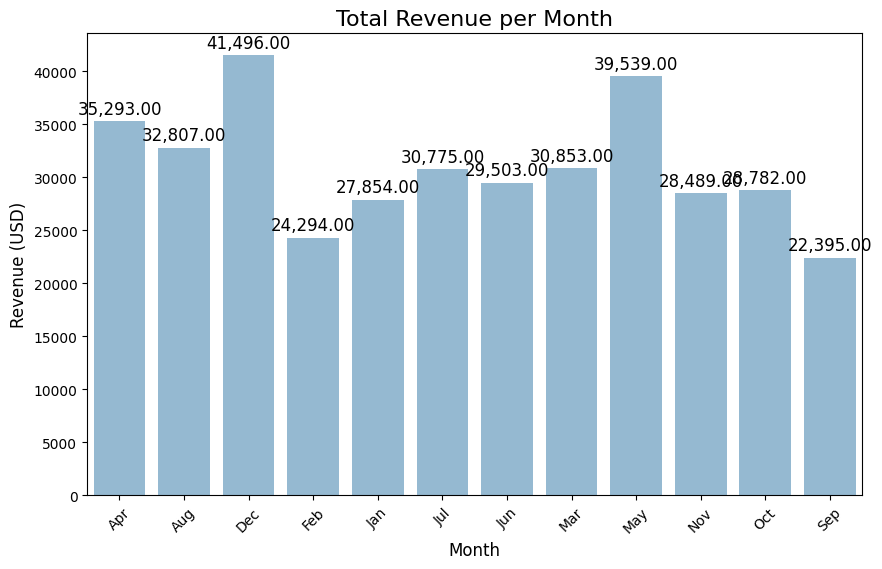

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette yang konsisten
sns.set_palette("Blues_d")  # Palet warna biru yang konsisten

# Total Revenue per Month
monthly_revenue = df.groupby('Month_Name')['Purchase Amount (USD)'].sum()

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Total Revenue per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)

# Menambahkan nilai di setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 9), textcoords='offset points')

# Menampilkan grafik
plt.xticks(rotation=45)
plt.show()

### Item Paling Laris

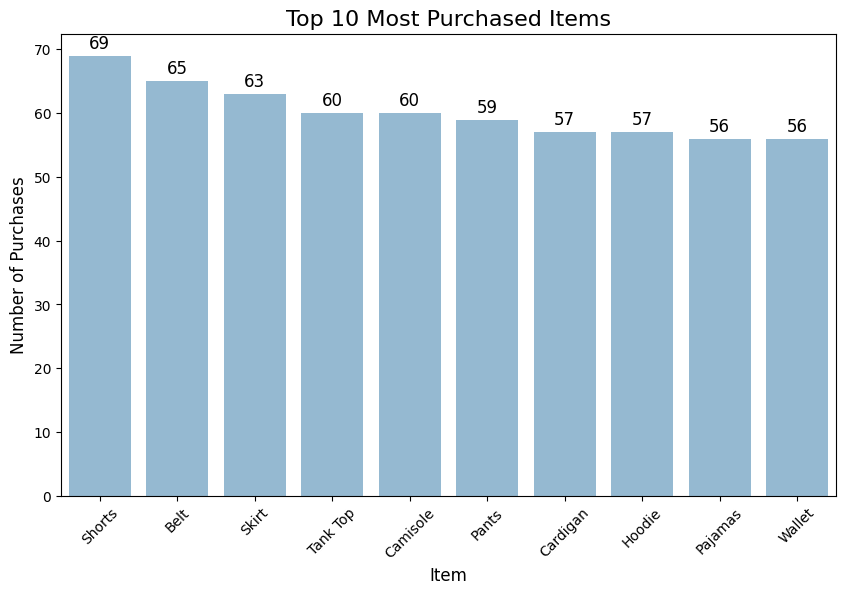

In [107]:
# Item Paling Laris
top_items = df['Item Purchased'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_items.index, y=top_items.values)
plt.title('Top 10 Most Purchased Items', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

# Menambahkan nilai di setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 9), textcoords='offset points')

# Menampilkan grafik
plt.xticks(rotation=45)
plt.show()

### Simpan Hasil Analisis dalam DataFrame

In [111]:
# Hasil analisis
analysis_results = {
    'Total Revenue': [total_revenue],
    'Average Purchase per Transaction': [average_purchase_per_transaction],
    'Top Item Purchased': [top_items.index[0]],
    'Top Item Purchase Count': [top_items.iloc[0]]
}

analysis_df = pd.DataFrame(analysis_results)
print(analysis_df)


   Total Revenue  Average Purchase per Transaction Top Item Purchased  \
0       372080.0                        149.609972             Shorts   

   Top Item Purchase Count  
0                       69  


# B. ANALISIS WAKTU

### 1. Tren Penjualan dari Waktu ke Waktu

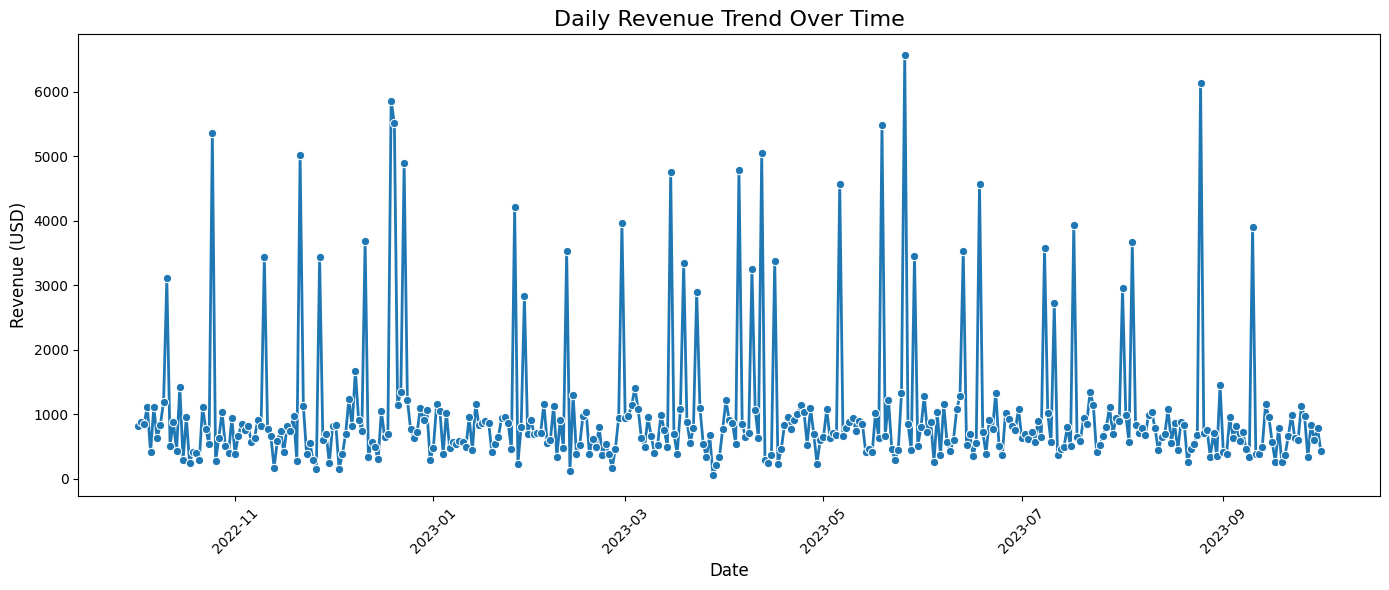

In [112]:
# Agregasi penjualan harian
daily_sales = df.groupby('Date Purchase')['Purchase Amount (USD)'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Date Purchase', y='Purchase Amount (USD)', marker='o', linewidth=2, color='#1f77b4')
plt.title('Daily Revenue Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Hari/Tanggal Puncak Pembelian

In [113]:
# Cari tanggal dengan pendapatan tertinggi
peak_day = daily_sales.loc[daily_sales['Purchase Amount (USD)'].idxmax()]
print(f"Hari/Tanggal puncak pembelian adalah {peak_day['Date Purchase'].date()} dengan total revenue sebesar ${peak_day['Purchase Amount (USD)']:,.2f}")

Hari/Tanggal puncak pembelian adalah 2023-05-26 dengan total revenue sebesar $6,568.00


# C. Analisis Pembayaran

### 1. Distribusi Metode Pembayaran

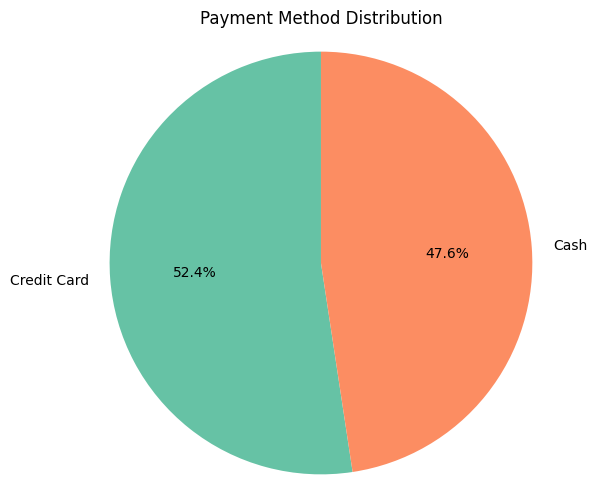

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13260\288977034.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Payment Method', palette='Set2')


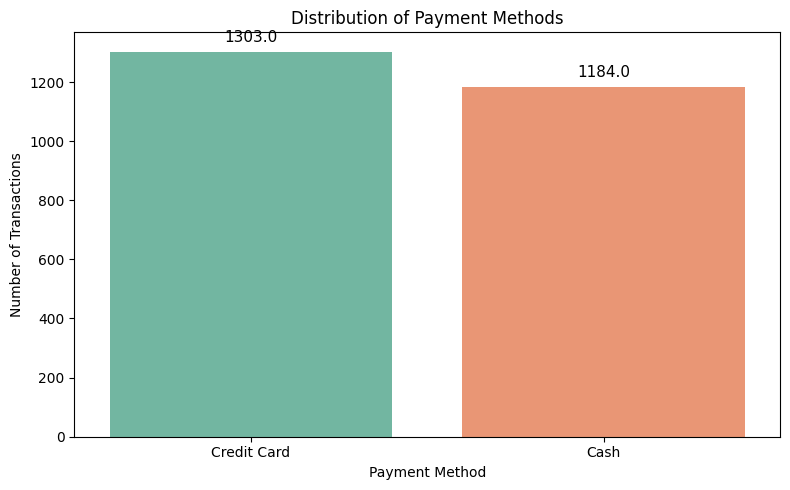

In [114]:
# Pie Chart Distribusi Metode Pembayaran
payment_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Payment Method Distribution')
plt.axis('equal')  # Circular
plt.show()

# Bar Plot Distribusi
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Payment Method', palette='Set2')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')

# Tambahkan nilai di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### 2. Metode Pembayaran Paling Sering Digunakan

In [115]:
most_common_method = payment_counts.idxmax()
most_common_count = payment_counts.max()

print(f"Metode pembayaran yang paling sering digunakan adalah '{most_common_method}' dengan jumlah {most_common_count} transaksi.")

Metode pembayaran yang paling sering digunakan adalah 'Credit Card' dengan jumlah 1303 transaksi.


# D. Analisis Ulasan / Rating

### 1. Rata-Rata Rating Keseluruhan


In [116]:
avg_rating = df['Review Rating'].mean()
print(f"⭐ Rata-rata rating keseluruhan: {avg_rating:.2f} dari 5")

⭐ Rata-rata rating keseluruhan: 2.99 dari 5


### 2. Item dengan Rating Tertinggi dan Terendah

In [118]:
# Rata-rata rating per item
item_rating = df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False)

# 5 tertinggi
top_rated = item_rating.head(5)
print("\n🔝 5 Item dengan Rating Tertinggi:")
print(top_rated)

# 5 terendah
lowest_rated = item_rating.tail(5)
print("\n🔻 5 Item dengan Rating Terendah:")
print(lowest_rated)


🔝 5 Item dengan Rating Tertinggi:
Item Purchased
Sun Hat       3.508108
Flip-Flops    3.348649
Skirt         3.333333
Jumpsuit      3.270000
Handbag       3.237736
Name: Review Rating, dtype: float64

🔻 5 Item dengan Rating Terendah:
Item Purchased
Sunglasses       2.668519
Leggings         2.657143
Jacket           2.635556
Flannel Shirt    2.590196
Tunic            2.535294
Name: Review Rating, dtype: float64


### 3. Apakah Pembelian Lebih Mahal Dapat Rating Lebih Tinggi?


🔍 Korelasi antara harga dan rating: 0.05


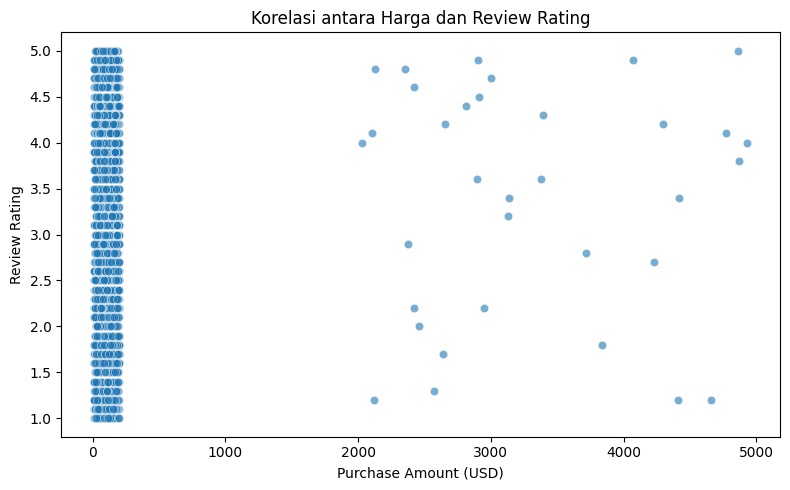

In [119]:
# Korelasi antara harga dan rating
correlation = df[['Purchase Amount (USD)', 'Review Rating']].corr().iloc[0, 1]
print(f"\n🔍 Korelasi antara harga dan rating: {correlation:.2f}")

# Visualisasi korelasi
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Purchase Amount (USD)', y='Review Rating', alpha=0.6, color='#1f77b4')
plt.title('Korelasi antara Harga dan Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.tight_layout()
plt.show()

##### 📌 Korelasi positif mendekati 1 = cenderung harga tinggi → rating tinggi
##### 📌 Korelasi negatif = harga tinggi → rating rendah
##### 📌 Dekat 0 = tidak berkorelasi signifikan

# E. Segmentasi Customer

### 1. Jumlah Pembelian per Customer

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13260\871809443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=purchase_per_customer.index.astype(str), y=purchase_per_customer.values, palette="viridis")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13260\871809443.py:15: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


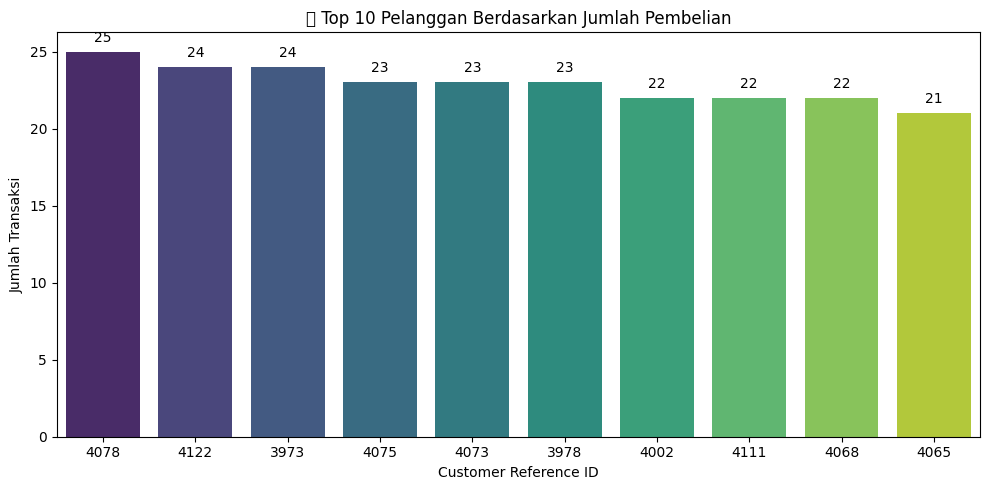

In [122]:
# Jumlah transaksi per customer
purchase_per_customer = df['Customer Reference ID'].value_counts().head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=purchase_per_customer.index.astype(str), y=purchase_per_customer.values, palette="viridis")
plt.title('🔟 Top 10 Pelanggan Berdasarkan Jumlah Pembelian')
plt.xlabel('Customer Reference ID')
plt.ylabel('Jumlah Transaksi')

# Tambahkan label nilai
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### 2. Total Pembelanjaan per Customer

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13260\3532769393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=spending_per_customer.index.astype(str), y=spending_per_customer.values, palette="magma")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13260\3532769393.py:15: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


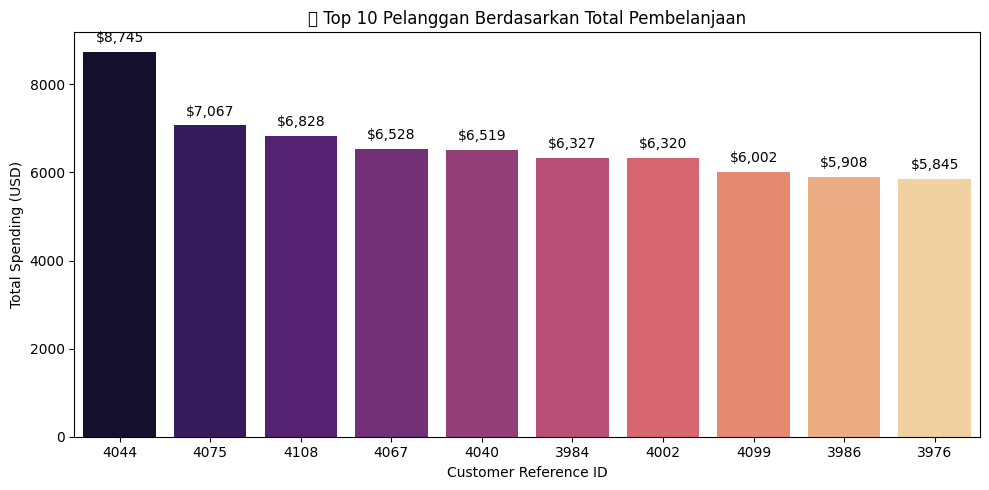

In [123]:
# Total belanja per customer
spending_per_customer = df.groupby('Customer Reference ID')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=spending_per_customer.index.astype(str), y=spending_per_customer.values, palette="magma")
plt.title('🔟 Top 10 Pelanggan Berdasarkan Total Pembelanjaan')
plt.xlabel('Customer Reference ID')
plt.ylabel('Total Spending (USD)')

# Tambahkan label nilai
for p in ax.patches:
    ax.annotate(f'${int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()